Matriks Kebingungan:
[[2 1]
 [1 1]]
Akurasi: 60.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



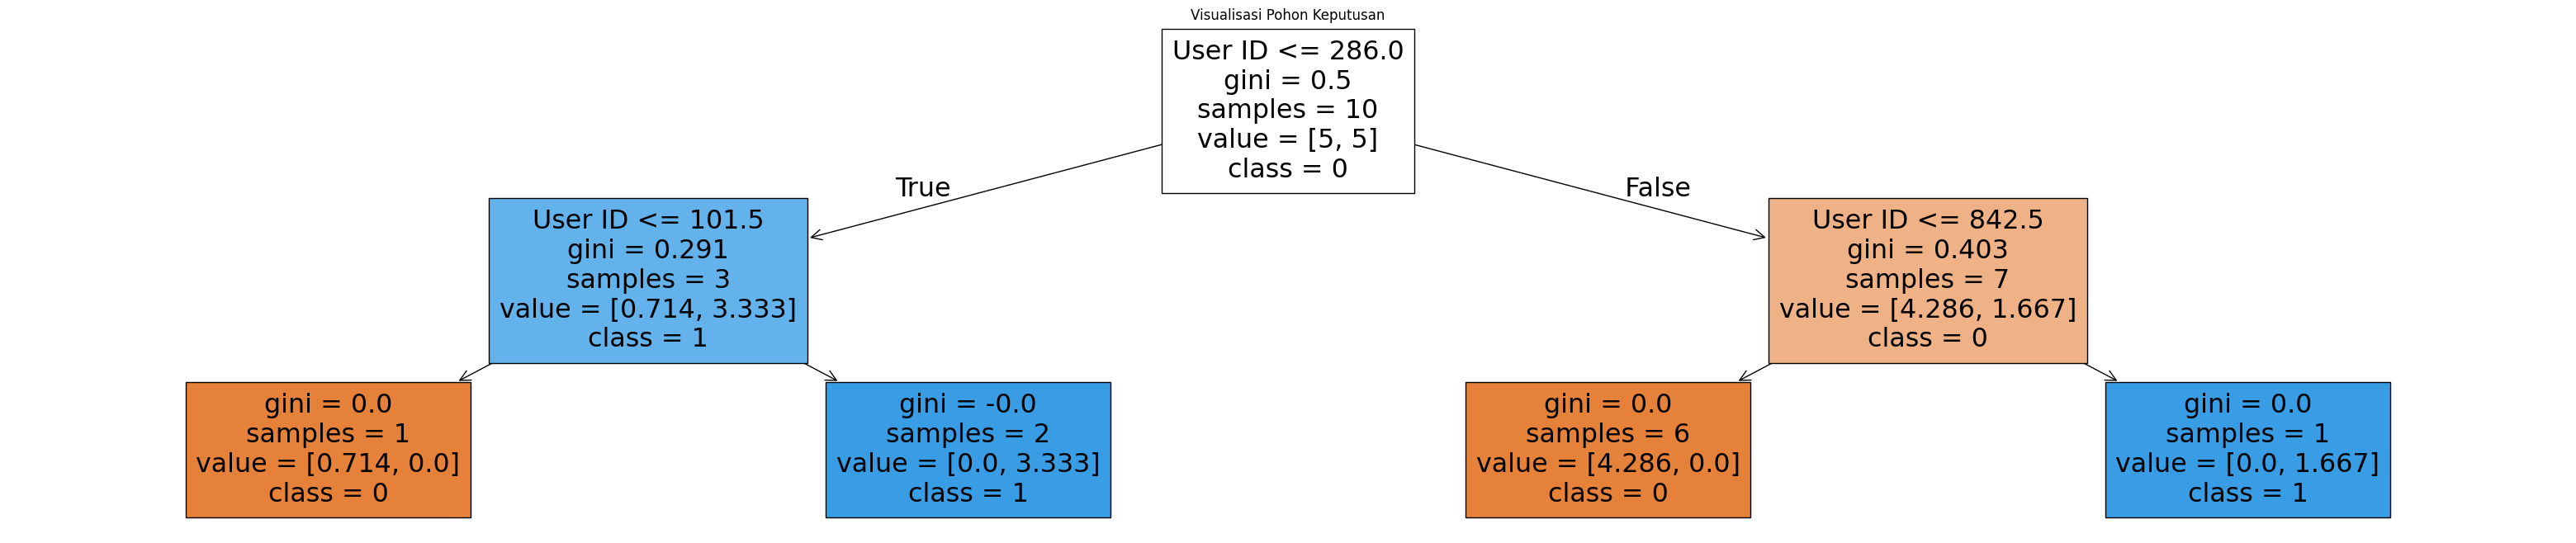

In [9]:
# Mengimpor paket yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Memuat dataset
file_path = 'C:/Users/user/car_data.csv'
data = pd.read_csv(file_path)

# 2. Pra-pemrosesan data
# Memeriksa nilai yang hilang
data.dropna(inplace=True)  # Menghapus baris yang memiliki nilai kosong (missing values).

# 3. Mengonversi variabel kategorikal menjadi numerik
# Konversi kolom-kolom kategorikal menjadi format one-hot encoding. drop_first=True menghindari dummy variable trap (redundansi kolom).
data = pd.get_dummies(data, columns=[ 'Gender', 'Age', 'AnnualSalary'], drop_first=True)

# 4. Mendefinisikan fitur dan variabel target
X = data.drop('Purchased', axis=1) # X: Semua kolom kecuali kolom target (Purchased).
y = data['Purchased']  # Kolom target — apakah seseorang membeli mobil (1) atau tidak (0).

# 5.Split Dataset
#Membagi dataset menjadi:
# 70% untuk pelatihan
# 30% untuk pengujian Dengan random_state=42 agar hasil dapat direproduksi.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Membuat dan melatih pengklasifikasi pohon keputusan dengan bobot kelas
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# 7. Membuat prediksi
y_pred = clf.predict(X_test)

# 8. Mengevaluasi model
print("Matriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred) * 100)
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division ke 0, 
# mencegah error jika ada pembagian nol (misalnya jika tidak ada prediksi untuk satu kelas).

# 9. Memvisualisasikan pohon keputusan 
plt.figure(figsize=(40, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str))
plt.title("Visualisasi Pohon Keputusan")
plt.show()